## `Flight Delay Prediction`
### **Part 2:** Data Cleaning and Feature Selection

Ali Bahrami

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline


In [30]:
# Read from extracted data
# Note: Null values have already been treated during the prepocessing for EDA
df_flights = pd.read_csv("data/flights.csv")

### Outlier Treatment

Text(0.5, 1.0, 'Arrival Delays without Outlier Treatment')

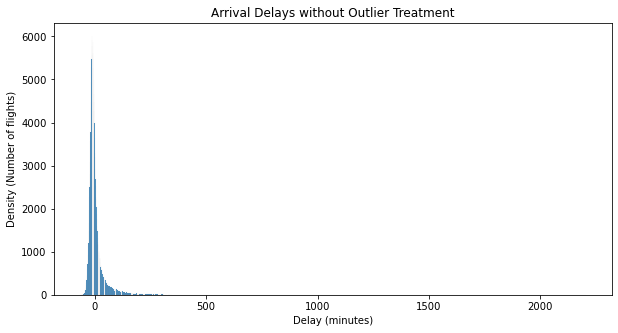

In [31]:
# From EDA Task one
# Arrival Delays without Outlier Treatment
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')

sns.histplot(df_flights, x="arr_delay").set_title("Arrival Delays without Outlier Treatment", size=12)

In [32]:
df_flights.arr_delay.describe()

count    195872.000000
mean          5.328388
std          49.285795
min         -70.000000
25%         -15.000000
50%          -6.000000
75%           8.000000
max        2206.000000
Name: arr_delay, dtype: float64

In [33]:
# We will see an upper limit and lower limit using 3 standard deviations.
# Every data point that lies beyond the upper limit and lower limit will be an outlier.
upper = df_flights.arr_delay.mean() + 3*df_flights.arr_delay.std()
lower = df_flights.arr_delay.mean() -3*df_flights.arr_delay.std()
print(upper)
print(lower)


153.18577270733118
-142.5289968537125


In [34]:
## Filter out the outliers
df_flights = df_flights[(df_flights.arr_delay<upper) & (df_flights.arr_delay>lower)]
df_flights.head()

fl_date mkt_unique_carrier tail_num origin origin_city_name dest  \
0  2018-05-04                 DL   N754EV    BOS       Boston, MA  RIC   
2  2019-12-20                 AA   N763US    CLT    Charlotte, NC  SAT   
3  2019-07-14                 DL   N961DL    ATL      Atlanta, GA  PWM   
4  2019-04-08                 AA   N679AW    PHX      Phoenix, AZ  BOI   
5  2019-12-26                 UA   N464UA    LAS    Las Vegas, NV  DEN   

    dest_city_name  crs_dep_time  dep_time  dep_delay  ...  weather_delay  \
0     Richmond, VA          1455    1453.0       -2.0  ...            0.0   
2  San Antonio, TX          1610    1630.0       20.0  ...            0.0   
3     Portland, ME          2114    2114.0        0.0  ...            0.0   
4        Boise, ID          2021    2015.0       -6.0  ...            0.0   
5       Denver, CO          1645    1641.0       -4.0  ...            0.0   

   nas_delay  security_delay  late_aircraft_delay            carrier  month  \
0        0.0             0.0                  0.0    Delta Air Lines      5   
2        0.0             0.0                  0.0  American Airlines     12   
3        0.0             0.0                  0.0    Delta Air Lines      7   
4        0.0             0.0                  0.0  American Airlines      4   
5        0.0             0.0                  0.0    United Airlines     12   

   day_of_week  haul_length    route  flight_delayed  
0            4        short  BOS-RIC               0  
2            4        short  CLT-SAT               1  
3            6        short  ATL-PWM               0  
4            0        short  PHX-BOI               0  
5            3        short  LAS-DEN               0  

[5 rows x 34 columns]

Text(0.5, 1.0, 'Arrival Delays  Post-outlier Treatment')

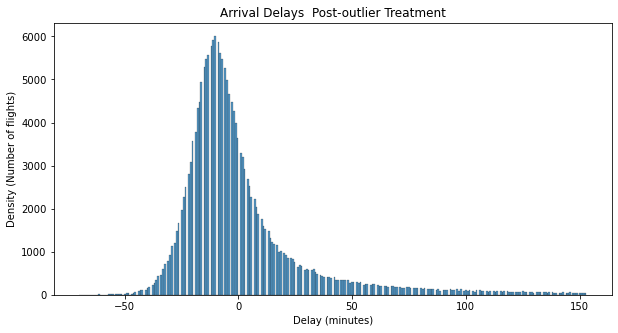

In [35]:
# Arrival Delays Post-outlier Treatment
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')

sns.histplot(df_flights, x="arr_delay").set_title("Arrival Delays  Post-outlier Treatment", size=12)

In [36]:
df_flights.shape

(192723, 34)

## Drop Unnecessary Columns 

Drop the columns that we will not be using in the modeling

In [37]:
cols = ['fl_date', 'mkt_unique_carrier', 'tail_num',
       'origin_city_name', 'dest_city_name',
       'dep_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'arr_time', 'cancelled', 'dup',
       'actual_elapsed_time',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'flight_delayed',
       'haul_length', 'route']
df_flights = df_flights.drop(columns=cols)

In [38]:
df_flights.head()

origin dest  crs_dep_time  dep_delay  crs_arr_time  arr_delay  \
0    BOS  RIC          1455       -2.0          1649      -14.0   
2    CLT  SAT          1610       20.0          1822       19.0   
3    ATL  PWM          2114        0.0          2355      -14.0   
4    PHX  BOI          2021       -6.0          2330      -14.0   
5    LAS  DEN          1645       -4.0          1937      -17.0   

   crs_elapsed_time  air_time  distance            carrier  month  day_of_week  
0             114.0      78.0     474.0    Delta Air Lines      5            4  
2             192.0     171.0    1095.0  American Airlines     12            4  
3             161.0     133.0    1027.0    Delta Air Lines      7            6  
4             129.0     101.0     735.0  American Airlines      4            0  
5             112.0      82.0     628.0    United Airlines     12            3

In [40]:
# we won't be using the origin and dest data as there are too many airports to be able to included in the model
cols = ['origin', 'dest']
df_flights = df_flights.drop(columns=cols)

## Feature Engineer Time-Related Data

In [42]:
# bin the time related columns into 3 categories: morning (1), afternoon(2), night(3)
df_flights['crs_dep_time'] = np.ceil(df_flights['crs_dep_time']/800).apply(int)
df_flights['crs_arr_time'] = np.ceil(df_flights['crs_arr_time']/800).apply(int)

In [46]:
df_flights.crs_arr_time.unique()

array([3, 1, 2])

In [47]:
df_flights.columns

Index(['crs_dep_time', 'dep_delay', 'crs_arr_time', 'arr_delay',
       'crs_elapsed_time', 'air_time', 'distance', 'carrier', 'month',
       'day_of_week'],
      dtype='object')

## Get Dummies

In [48]:
# get dummies for all categoricals
# drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation.
# Hence it reduces the correlations created among dummy variables.

crs_dep_time_dummies = pd.get_dummies(df_flights['crs_dep_time'], prefix='crs_dep_time', drop_first=True)
crs_arr_time_dummies = pd.get_dummies(df_flights['crs_arr_time'], prefix='crs_arr_time', drop_first=True)
carrier_dummies = pd.get_dummies(df_flights['carrier'], prefix='carrier', drop_first=True)
month_dummies = pd.get_dummies(df_flights['month'], prefix='month', drop_first=True)
day_of_week_dummies = pd.get_dummies(df_flights['day_of_week'], prefix='day_of_week', drop_first=True)


In [ ]:
df_flights = pd.concat([df_flights, crs_dep_time_dummies, crs_arr_time_dummies, carrier_dummies, month_dummies, day_of_week_dummies], axis=1)

In [50]:
# Drop the original columns
df_flights = df_flights.drop(['crs_dep_time', 'crs_arr_time', 'carrier', 'month', 'day_of_week'], axis=1)

In [52]:
df_flights.dtypes

dep_delay                     float64
arr_delay                     float64
crs_elapsed_time              float64
air_time                      float64
distance                      float64
crs_dep_time_2                  uint8
crs_dep_time_3                  uint8
crs_arr_time_2                  uint8
crs_arr_time_3                  uint8
carrier_Alaska Airlines         uint8
carrier_American Airlines       uint8
carrier_Delta Air Lines         uint8
carrier_Frontier Airlines       uint8
carrier_Hawaiian Airlines       uint8
carrier_JetBlue Airways         uint8
carrier_Southwest Airlines      uint8
carrier_Spirit Airlines         uint8
carrier_United Airlines         uint8
carrier_Virgin America          uint8
month_2                         uint8
month_3                         uint8
month_4                         uint8
month_5                         uint8
month_6                         uint8
month_7                         uint8
month_8                         uint8
month_9     

In [51]:
df_flights.head()

dep_delay  arr_delay  crs_elapsed_time  air_time  distance  crs_dep_time_2  \
0       -2.0      -14.0             114.0      78.0     474.0               1   
2       20.0       19.0             192.0     171.0    1095.0               0   
3        0.0      -14.0             161.0     133.0    1027.0               0   
4       -6.0      -14.0             129.0     101.0     735.0               0   
5       -4.0      -17.0             112.0      82.0     628.0               0   

   crs_dep_time_3  crs_arr_time_2  crs_arr_time_3  carrier_Alaska Airlines  \
0               0               0               1                        0   
2               1               0               1                        0   
3               1               0               1                        0   
4               1               0               1                        0   
5               1               0               1                        0   

   ...  month_9  month_10  month_11  month_12  day_of_week_1  day_of_week_2  \
0  ...        0         0         0         0              0              0   
2  ...        0         0         0         1              0              0   
3  ...        0         0         0         0              0              0   
4  ...        0         0         0         0              0              0   
5  ...        0         0         0         1              0              0   

   day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  
0              0              1              0              0  
2              0              1              0              0  
3              0              0              0              1  
4              0              0              0              0  
5              1              0              0              0  

[5 rows x 36 columns]

In [54]:
df_flights.shape

(192723, 36)

## Export Processed Data for Modeling

In [53]:
df_flights.to_csv("data/modeling.csv", index=False)